In [19]:
import requests, pandas, numpy, matplotlib.pyplot
from bs4 import BeautifulSoup

In [20]:
page = requests.get("https://ocrportal.hhs.gov/ocr/breach/breach_report.jsf")

In [21]:
page.status_code

200

In [22]:
soup = BeautifulSoup(page.content, 'html.parser')

In [30]:
soup.find_all(role="gridcell")
gridCells = soup.find_all(role="gridcell")

In [24]:
nameCoveredEntityList = []
stateList = []
coveredEntityTypeList = []
affectIndividualsList = []
breachSubmittedDateList = []
typeOfBreachList = []
locationOfBreachedInformationList = []
singleBreachList = []

In [25]:
skipTheBoringStuffCounter = 0
theGoodStuffCounter = 0

In [26]:
for c in gridCells:
   if skipTheBoringStuffCounter <=4:
       skipTheBoringStuffCounter=skipTheBoringStuffCounter+1
   if skipTheBoringStuffCounter >4:
       c = c.get_text().strip()
   if c!='':
       singleBreachList.append(c)
       theGoodStuffCounter=theGoodStuffCounter+1
   if theGoodStuffCounter == 8:
       nameCoveredEntityList.append(singleBreachList[0])
       stateList.append(singleBreachList[1])
       coveredEntityTypeList.append(singleBreachList[2])
       affectIndividualsList.append(singleBreachList[3])
       breachSubmittedDateList.append(singleBreachList[4])
       typeOfBreachList.append(singleBreachList[5])
       locationOfBreachedInformationList.append(singleBreachList[6])
       theGoodStuffCounter =0
       singleBreachList = []

In [27]:
breachDF = pandas.DataFrame({
"Company Name":nameCoveredEntityList,
"State":stateList,
"Company Type":coveredEntityTypeList,
"Affected Individuals":affectIndividualsList,
"Breach Date":breachSubmittedDateList,
"Breach Type":typeOfBreachList,
"Data location":locationOfBreachedInformationList
})
breachDF.head()

,Affected Individuals,Breach Date,Breach Type,Company Name,Company Type,Data location,State
0,"<td role=""gridcell"" style=""width:16px""><div cl...","Partners HealthCare System, Inc.",MA,"<td colspan=""4"" role=""gridcell"">As required by...","<td colspan=""4"" role=""gridcell""> <a class...",Healthcare Provider,"<td colspan=""4"" role=""gridcell"">This page list..."
1,No,CarePlus Health Plan [case #HU1800066],KY,02/05/2018,Desktop Computer,Health Plan,Hacking/IT Incident
2,No,City of Detroit,MI,02/05/2018,Paper/Films,Healthcare Provider,Unauthorized Access/Disclosure
3,No,Ron's Pharmacy Services,CA,02/05/2018,Other Portable Electronic Device,Healthcare Provider,Loss
4,No,Eastern Maine Medical Center,ME,02/02/2018,Email,Healthcare Provider,Hacking/IT Incident


In [28]:
breachDF.groupby('Breach Type').size()

Breach Type
Business Associate      3
CA                      1
Health Plan            13
Healthcare Provider    79
KY                      1
MA                      1
ME                      1
MI                      1
dtype: int64

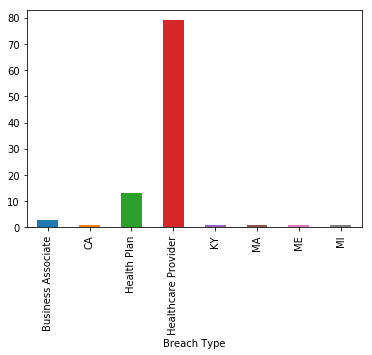

In [29]:
%matplotlib inline
breachDist = breachDF.groupby('Breach Type').size()
breachDist.plot(kind='bar')